In [32]:
import openmesh as om
import matplotlib.pyplot as plt

mesh = om.TriMesh()

# vertices de malla
vh0 = mesh.add_vertex([0, 0, 0])
vh1 = mesh.add_vertex([0, 1, 0])
vh2 = mesh.add_vertex([1, 1, 0])
vh3 = mesh.add_vertex([1, 0, 0])
vh4 = mesh.add_vertex([0.5, 0.5, 0])

#Celdas
fh0 = mesh.add_face(vh0, vh1, vh4)
fh1 = mesh.add_face(vh1, vh2, vh4)
fh2 = mesh.add_face(vh2, vh3, vh4)
fh3 = mesh.add_face(vh3, vh0, vh4)

om.write_mesh('refined_mesh.off', mesh)


In [33]:
for fh in mesh.faces():
    # IMPRIMIR LOS INDICES DE CADA CELDA(faces)
    index = fh.idx() # devuelve el indice de la celda
    print("Cara ", index)
    # Recorrer los vertices de cada cara y mostrar sus indices
    
    # print('\n')    
    for vh in mesh.fv(fh):
        idx = vh.idx() # devuelve indice del VERTICE
        print("\t vh.idx", idx)
        
    print('\n')
    for fh in mesh.ff(fh):
        nCell = fh.idx()
        print("\t fh.idx", nCell)
        
    print('\n')
    for eh in mesh.fe(fh):
        nEdge = eh.idx()
        print('\t Lados', nEdge, ' boundary?', mesh.is_boundary(eh))

Cara  0
	 vh.idx 0
	 vh.idx 1
	 vh.idx 4


	 fh.idx 3
	 fh.idx 1


	 Lados 1  boundary? False
	 Lados 3  boundary? True
	 Lados 4  boundary? False
Cara  1
	 vh.idx 1
	 vh.idx 2
	 vh.idx 4


	 fh.idx 0
	 fh.idx 2


	 Lados 4  boundary? False
	 Lados 5  boundary? True
	 Lados 6  boundary? False
Cara  2
	 vh.idx 2
	 vh.idx 3
	 vh.idx 4


	 fh.idx 1
	 fh.idx 3


	 Lados 6  boundary? False
	 Lados 7  boundary? True
	 Lados 2  boundary? False
Cara  3
	 vh.idx 3
	 vh.idx 0
	 vh.idx 4


	 fh.idx 2
	 fh.idx 0


	 Lados 2  boundary? False
	 Lados 0  boundary? True
	 Lados 1  boundary? False


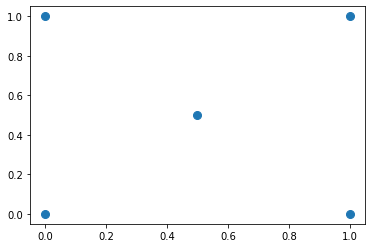

In [34]:
P = mesh.points()
plt.plot(P[:,0], P[:,1], 'o', markersize=8)
plt.show()


In [35]:
def mesh_refinement(fht):
    Xf = []
    Yf = []
    Vh = []
    for vh in mesh.fv(fht):
        p = mesh.point(vh) # devolver un arreglo de long 3
        Xf.append(p[0])
        Yf.append(p[1])
        Vh.append(vh)       
        
    xbar = sum(Xf)/3
    ybar = sum(Yf)/3
    vhbar = mesh.add_vertex([xbar, ybar, 0])

    # al parecer se debe seguir al orden
    # 1. delete, 2. add, 3. garbage_collection
    # sino algo no funciona, aún si no es cierto porque
    
    mesh.delete_face(fht)
    
    fhA = mesh.add_face(Vh[0],Vh[1],vhbar)
    fhB = mesh.add_face(Vh[1],Vh[2],vhbar)
    fhC = mesh.add_face(Vh[2],Vh[0],vhbar)
    
    mesh.garbage_collection()
    
    # conectar niveles fh <-> (fhA, fhB, fhC)
    # varios niveles de la malla: mesh[k]
    
print(len(mesh.faces()))

FH=[]
for fh in mesh.faces():
    FH.append(fh)
FH=FH.copy()

for fh in FH:
    mesh_refinement(fh) 
    
print(len(mesh.faces()))


4
12


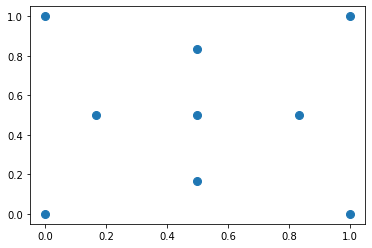

In [36]:
P = mesh.points()
plt.plot(P[:,0], P[:,1], 'o', markersize=8)


om.write_mesh('refined_mesh.off', mesh)

In [37]:
from scipy.spatial import Delaunay
T = Delaunay(P)
plt.triplot(P[:,0],P[:,1],T.simplices)


QhullError: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull d Qz Qbb Q12 Qt Qc
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 916323185  delaunay  Qz-infinity-point  Qbbound-last  Q12-allow-wide
  Qtriangulate  Qcoplanar-keep  _pre-merge  _zero-centrum  Qinterior-keep
  Pgood  _max-width  1  Error-roundoff 2e-15  _one-merge 1.8e-14
  Visible-distance 1.2e-14  U-max-coplanar 1.2e-14  Width-outside 2.4e-14
  _wide-facet 7.3e-14  _maxoutside 2.4e-14

precision problems (corrected unless 'Q0' or an error)
      1 degenerate hyperplanes recomputed with gaussian elimination
      1 nearly singular or axis-parallel hyperplanes
      1 zero divisors during back substitute
      7 zero divisors during gaussian elimination

The input to qhull appears to be less than 4 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p3(v5):     1     0     0  0.45
- p9(v4):   0.5   0.5     0     1
- p1(v3):     0     1     0  0.45
- p2(v2):     1     1     0  0.91
- p0(v1):     0     0     0     0

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 2e-15.  The center point, facets and distances
to the center point are as follows:

center point      0.5      0.5        0   0.5636

facet p9 p1 p2 p0 distance=    0
facet p3 p1 p2 p0 distance=    0
facet p3 p9 p2 p0 distance=    0
facet p3 p9 p1 p0 distance=    0
facet p3 p9 p1 p2 distance=    0

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:         0         1  difference=    1
  1:         0         1  difference=    1
  2:         0         0  difference=    0
  3:         0         1  difference=    1

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 2e-15.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


In [38]:
P

array([[0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        ],
       [0.16666667, 0.5       , 0.        ],
       [0.5       , 0.83333333, 0.        ],
       [0.83333333, 0.5       , 0.        ],
       [0.5       , 0.16666667, 0.        ]])